Data Exploration and Cleaning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('/content/train (1).csv')
test_df = pd.read_csv('/content/test (1).csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display basic information
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTraining Data Columns:", train_df.columns)
print("\nMissing Values in Training Data:\n", train_df.isnull().sum())

# Handle missing values
train_df['keyword'] = train_df['keyword'].fillna('unknown')
train_df['location'] = train_df['location'].fillna('unknown')
test_df['keyword'] = test_df['keyword'].fillna('unknown')
test_df['location'] = test_df['location'].fillna('unknown')

# Check class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Real (1) vs Fake (0) Tweets')
plt.show()

 Text Preprocessing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# First, let's download all required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    """Clean text by removing URLs, mentions, and special characters"""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

def preprocess_text(text):
    """Tokenize, remove stopwords, and stem text"""
    try:
        text = clean_text(text)
        tokens = word_tokenize(text)
        tokens = [ps.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}")
        print(f"Error: {e}")
        return ""

# Load data - IMPORTANT: Replace with your actual file paths
try:
    # Option 1: If files are in the same directory as your notebook
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
except FileNotFoundError:
    try:
        # Option 2: If files are in a different directory
        train_df = pd.read_csv('/content/train.csv')  # Common path in Google Colab
        test_df = pd.read_csv('/content/test.csv')
    except FileNotFoundError:
        # Option 3: If you need to upload files
        from google.colab import files
        print("Please upload your train.csv and test.csv files")
        files.upload()
        train_df = pd.read_csv('/content/train (1).csv')
        test_df = pd.read_csv('/content/test (1).csv')

# Handle missing values
train_df['keyword'] = train_df['keyword'].fillna('unknown')
train_df['location'] = train_df['location'].fillna('unknown')
test_df['keyword'] = test_df['keyword'].fillna('unknown')
test_df['location'] = test_df['location'].fillna('unknown')

# Apply preprocessing
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Verify preprocessing
print("Data loaded and preprocessed successfully!")
print("Training data sample:")
print(train_df[['text', 'processed_text']].head())

Please upload your train.csv and test.csv files


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving test (1).csv to test (1).csv
Saving train (1).csv to train (1).csv
Data loaded and preprocessed successfully!
Training data sample:
                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                      processed_text  
0          deed reason earthquak may allah forgiv us  
1               forest fire near la rong sask canada  
2  resid ask shelter place notifi offic evacu she...  
3        peopl receiv wildfir evacu order california  
4  got sent photo rubi alaska smoke wildfir pour ...  


Feature Extraction

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['processed_text'])
X_test = tfidf.transform(test_df['processed_text'])
y_train = train_df['target']

Model Building and Evaluation


Logistic Regression Performance:
Accuracy: 0.7918581746552856
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



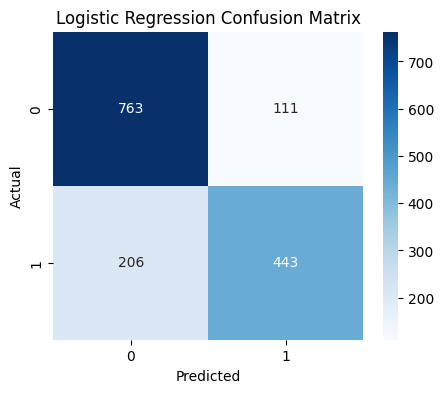


SVM Performance:
Accuracy: 0.7984241628365069
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       874
           1       0.83      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



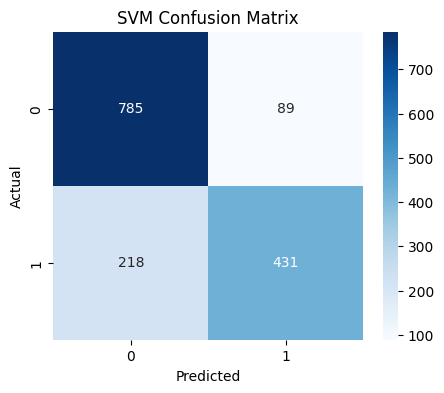


Naive Bayes Performance:
Accuracy: 0.8069599474720945
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



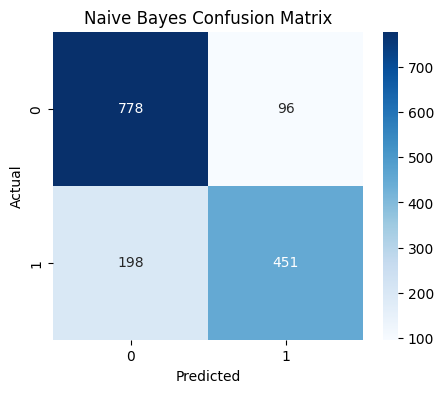

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val)

    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

# Tune Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_split, y_train_split)

best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred = best_lr.predict(X_val)
print("\nTuned Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Tuned Logistic Regression Performance:
Accuracy: 0.7925147734734077
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



Final Model Training and Submission

In [27]:
# Train final model on full training data
final_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
final_model.fit(X_train, y_train)

# Predict on test data
test_predictions = final_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': test_predictions
})

# Save submission
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!
